## Sentiment Analysis for Under-Resourced Language

##### Train a sentiment classifier (Positive, Negative, Neutral) on a corpus of the provided documents. 
Your goal is to maximize accuracy. There is special interest in being able to
accurately detect negative sentiment. The training data includes documents from a
wide variety of sources, not merely social media, and some of it may be inconsistently
labeled. Please describe the outcomes in your work sample including how data
limitations impact your results and how these limitations could be addressed in a larger 

In [49]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
import re  
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn import metrics
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\EBA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\EBA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\EBA\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\EBA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
df = pd.read_csv('train.csv') #read dataset

In [29]:
del df['idk'] #del unwanted columns

In [30]:
df.isnull().sum() #check for null value

Text         1
Sentiment    0
dtype: int64

We filled missing value using pad method

In [31]:
df.fillna(method ='pad') #fill nan value based on previous word

,Text,Sentiment
0,Sai kha ya her kisi kay bus ki bat nhi hai lak...,Positive
1,sahi bt h,Positive
2,"Kya bt hai,",Positive
3,Wah je wah,Positive
4,Are wha kaya bat hai,Positive
...,...,...
20224,Hamari jese awam teli laga k mazay leti,Negative
20225,Kaash hum b parhay likhay hotayKabhi likhtay g...,Negative
20226,Bahi sayasat kufrrr ha saaaf bttttt ha qanon s...,Negative
20227,aanti toh gussa e kr gai hain,Negative


In [32]:
df.Sentiment.value_counts() #count the value in the sentiment column

Neutral     8929
Positive    6013
Negative    5286
Neative        1
Name: Sentiment, dtype: int64

In [33]:
df["Sentiment"] = df.Sentiment.replace(to_replace = "Neative", value = "Negative") #Replace Neative to Negative

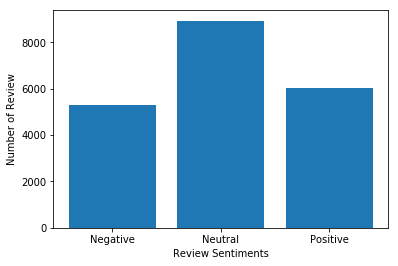

In [34]:
Sentiment_Count = df.groupby('Sentiment').count()
plt.bar(Sentiment_Count.index.values, Sentiment_Count['Text'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

### Remove noise from out Dataset

In [35]:
df['Text'] = df['Text'].astype('str') #Convert to strings

In [36]:

def remove_pattern(input_txt, pattern):
  r = re.findall(pattern, input_txt)
  for i in r:
    input_txt = re.sub(i, '', input_txt)
    
  return input_txt 

In [37]:
df['Text'] = np.vectorize(remove_pattern)(df['Text'], "@[\w]*") #remove @ and * from tweet
df['Text'] = df['Text'].str.replace("[^a-zA-Z#]", " ") # remove special characters, numbers, punctuations

### Wordcloud is a perfect way to view word frequency

In [38]:
from wordcloud import WordCloud

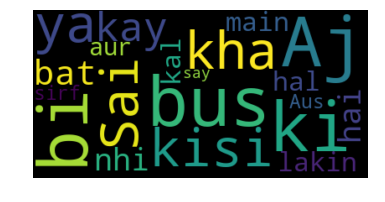

In [39]:
# Start with one review:
text = df.Text[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Tokenized words using count vectorizer

CountVectorizer convert a collection of text documents to a matrix of token counts

In [40]:
from sklearn.feature_extraction.text import CountVectorizer #Import Count Vectorizer

In [41]:
cv = CountVectorizer()


### Cross Validation

In [42]:
from sklearn.model_selection import train_test_split #Cross Validation 
train, valid = train_test_split(df, test_size=0.2) #split train and valid set 80/20

### Vectorize text

In [43]:
train_set= cv.fit_transform(train['Text'])
train_tag = train['Sentiment']
valid_set= cv.transform(valid['Text'])
valid_tag = valid['Sentiment']

### Build models

In [44]:
from sklearn.naive_bayes import MultinomialNB #Use Multinomial Naivebaye classifier
clf = MultinomialNB() 

# To train the classifier, simple do 
MU = clf.fit(train_set, train_tag)
from sklearn import metrics



### Bias and Variance Tradeoff on MultinomialNB

In [50]:
Mu_train = MU.predict(train_set)

print('Train accuracy = {}'.format(
        accuracy_score(Mu_train , train_tag) * 100)
     )
f1_score = metrics.f1_score(Mu_train, train_tag, average='macro')
print(' F1 Train classification score: {}'.format(f1_score* 100))

Mu_test= MU.predict(valid_set)

print('Test accuracy = {}'.format(
        accuracy_score(Mu_test, valid_tag) * 100)
     )
f1_score = metrics.f1_score(Mu_test, valid_tag, average='macro')
print(' F1 Test classification score: {}'.format(f1_score* 100))


Train accuracy = 84.06970277451646
 F1 Train classification score: 83.63261555895811
Test accuracy = 65.02718734552644
 F1 Test classification score: 64.31754468951529


### Use Random Forest Classifier

In [70]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=100, random_state=2, n_estimators = 10)
RF = clf.fit(train_set, train_tag)

### Bias and Variance Tradeoff for RF

In [71]:
RF_train = RF.predict(train_set)

print('Train accuracy = {}'.format(
        accuracy_score(RF_train , train_tag) * 100)
     )
f1_score = metrics.f1_score(RF_train, train_tag, average='macro')
print(' F1 Train classification score: {}'.format(f1_score* 100))

RF_test= RF.predict(valid_set)

print('Test accuracy = {}'.format(
        accuracy_score(RF_test, valid_tag) * 100)
     )
f1_score = metrics.f1_score(RF_test, valid_tag, average='macro')
print(' F1 Test classification score: {}'.format(f1_score* 100))


Train accuracy = 81.80189087313849
 F1 Train classification score: 80.97479127559534
Test accuracy = 59.07068709836876
 F1 Test classification score: 53.1293733605071


#### Using Sgd Linear model classifier

In [53]:
from sklearn import linear_model
clf2 = linear_model.SGDClassifier(max_iter=5,random_state=20,n_jobs=50, average = True, power_t =2, n_iter_no_change =1)
clf2.fit(train_set, train_tag)



C:\Users\EBA\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(alpha=0.0001, average=True, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=1, n_jobs=50, penalty='l2', power_t=2,
              random_state=20, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

### Bias and Variance Tradeoff for SGD

In [54]:
sgd_train = clf2.predict(train_set)

print('Train accuracy = {}'.format(
        accuracy_score(sgd_train , train_tag) * 100)
     )
f1_score = metrics.f1_score(sgd_train, train_tag, average='macro')
print(' F1 Train classification score: {}'.format(f1_score* 100))

sgd_test= clf2.predict(valid_set)

print('Test accuracy = {}'.format(
        accuracy_score(sgd_test, valid_tag) * 100)
     )
f1_score = metrics.f1_score(sgd_test, valid_tag, average='macro')
print(' F1 Test classification score: {}'.format(f1_score* 100))


Train accuracy = 84.98424272384601
 F1 Train classification score: 84.52769575208578
Test accuracy = 66.55956500247157
 F1 Test classification score: 65.01920454754072


#### Good fit SGD

#### XGBoost Classifier

In [68]:
import xgboost as xgb
clf = xgb.XGBClassifier(n_estimators=2000, random_state=2, max_dept = 4)

xgb= clf.fit(train_set, train_tag,
        verbose=True)

In [69]:
xgb_train = xgb.predict(train_set)

print('Train accuracy = {}'.format(
        accuracy_score(xgb_train , train_tag) * 100)
     )
f1_score = metrics.f1_score(xgb_train, train_tag, average='macro')
print(' F1 Train classification score: {}'.format(f1_score* 100))

xgb_test= xgb.predict(valid_set)

print('Test accuracy = {}'.format(
        accuracy_score(xgb_test, valid_tag) * 100)
     )
f1_score = metrics.f1_score(xgb_test, valid_tag, average='macro')
print(' F1 Test classification score: {}'.format(f1_score* 100))


Train accuracy = 77.48254340975097
 F1 Train classification score: 76.08272317168199
Test accuracy = 66.53484923381117
 F1 Test classification score: 63.836880252661935


#### Best Model  XGBOOST

# Using Adaboost classifier

In [87]:
from sklearn.ensemble import AdaBoostClassifier
Adaclf = AdaBoostClassifier(n_estimators=1000, random_state=9, algorithm='SAMME.R')
Ada = Adaclf.fit(train_set, train_tag)


### Bias and Variance Tradeoff for Adaboost

In [88]:
ada_train = Ada.predict(train_set)

print('Train accuracy = {}'.format(
        accuracy_score(ada_train , train_tag) * 100)
     )
f1_score = metrics.f1_score(ada_train, train_tag, average='macro')
print(' F1 Train classification score: {}'.format(f1_score* 100))

ada_test= Ada.predict(valid_set)

print('Test accuracy = {}'.format(
        accuracy_score(ada_test, valid_tag) * 100)
     )
f1_score = metrics.f1_score(ada_test, valid_tag, average='macro')
print(' F1 Test classification score: {}'.format(f1_score* 100))


Train accuracy = 71.21670889204721
 F1 Train classification score: 69.9170103010853
Test accuracy = 64.75531389026199
 F1 Test classification score: 62.59397130620956


#### Perfect model is Adaboost classifier

### Logistics Regression with Gridsearch parameter tunning

In [118]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
Log_pred= LogisticRegression(random_state=100,n_jobs=7, solver='lbfgs').fit(train_set, train_tag)
parameters = {'kernel':('linear', 'rbf'), 'C':[10, 100]}
Logs=GridSearchCV(clf, parameters)


### Bias and Varaince Tradeoff for logistics regression

In [132]:
LogsT = Log_pred.predict(train_set)

print('Train accuracy = {}'.format(
        accuracy_score(LogsT , train_tag) * 100)
     )
f1_score = metrics.f1_score(LogsT , train_tag, average='macro')
print(' F1 Train classification score: {}'.format(f1_score* 100))

Logs = Log_pred.predict(valid_set)

print('Test accuracy = {}'.format(
        accuracy_score(Logs , valid_tag) * 100)
     )
f1_score = metrics.f1_score(Logs , valid_tag, average='macro')
print(' F1 Test classification score: {}'.format(f1_score* 100))

Train accuracy = 95.0997960823086
 F1 Train classification score: 95.09024653454475
Test accuracy = 67.39990113692535
 F1 Test classification score: 65.65344725013082


### Confusion Matrix for the Logistics Regression

In [96]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [108]:
cm = confusion_matrix(valid_tag, xgb_test)

In [109]:
cm

array([[ 473,  458,  106],
       [  92, 1525,  177],
       [ 103,  418,  694]], dtype=int64)

In [115]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(z=[[ 473,  458,  106],
                                   [ 473,  458,  106],
                                    [ 103,  418,  694]],
                                   hoverongaps = False))
fig.show()



### Test on a random Tweet

In [116]:
custom = ['aanti toh gussa e kr gai hain'] #Shanti Toh has become angry
custom = cv.transform(custom)

In [120]:
prediction_random= xgb.predict(custom)
prediction_random

array(['Negative'], dtype=object)

In [121]:
prediction_random= Log_pred.predict(custom)
prediction_random

array(['Negative'], dtype=object)

## Conclusion

Although our goal is to maximize accuracy, bias and variance are other important factors to consider since our focus is on an under resources language and also adequately detecting negative sentiment without been bias.

## Outcome

##### I will break down my outcome into 6 sections

- Under resource language
- Understanding the dataset
- Insight derived from the corpus
- Model Interpretation
- How data limitation affect the model result
- How this limitation can be addressed in larger


There are over 6900 languages in the world today and only a small fraction offers the resources required for the implementation of Natural Language processing or Human Language Technologies.

However, most technologies are concerned with the language for which large resources are available or which have suddenly become of interest because of economic and political science. Unfortunately, most languages from the developing countries received only a little attention so far. One way we intend to improve the language divide is by building Natural Language applications. 


About 99% of the dataset is written in Hindi and the other 1% is in English. After effective cleaning and preprocessing, an intensive approach was taken toward the sentiment and I found that most texts sentiment are neutral. Furthermore, a word cloud technique was done.


After an effective data preprocessing and feature engineering, our high performance model with Bias and variance tradeoff was built with Xgboost Algorithm  an the accuracy is 66%. However, our goal  is to improve on the model overtime as more data are been feed into it.


Apparently, with the result from the high-performance model with bias and variance trade-off, more data are required to increase the accuracy and optimize the model.

This limitation can be address in large using data collection techquies, such as survey/questionaire, scraping of text written in hindi from social media, traditional data collection and deep learning apporach to improve the model accuracy.





#### Thank you